In [1]:
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
from detectron2.data.datasets import register_coco_instances

In [3]:
register_coco_instances('lslm_coco_test', {}, 
                        '/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', 
                       '/home/workspace/bolt_nut/datasets/lslm-test')

In [4]:
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
coco_lslm_test_metadata = MetadataCatalog.get("lslm_coco_test")
test_dataset_dicts = DatasetCatalog.get("lslm_coco_test")
coco_lslm_test_metadata

[03/28 07:18:23 d2.data.datasets.coco]: Loaded 10 images in COCO format from /home/workspace/bolt_nut/datasets/annotations/lslm_test.json


Metadata(evaluator_type='coco', image_root='/home/workspace/bolt_nut/datasets/lslm-test', json_file='/home/workspace/bolt_nut/datasets/annotations/lslm_test.json', name='lslm_coco_test', thing_classes=['bolt', 'nut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1})

In [6]:
import random 
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

/root/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


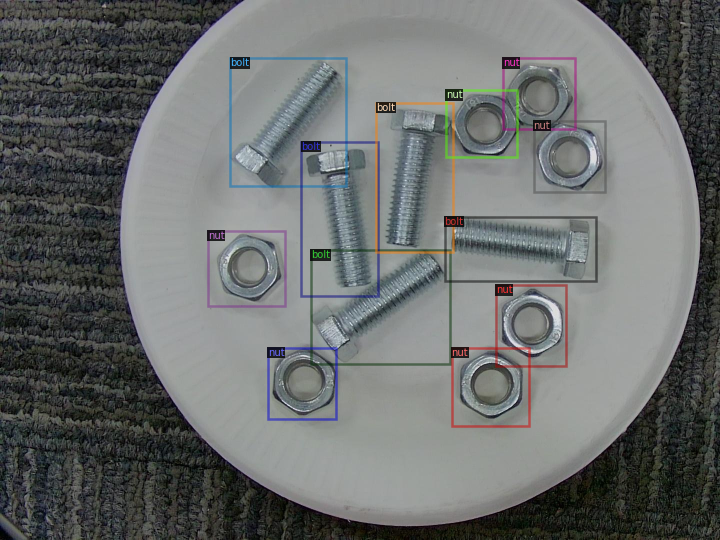

In [7]:
for image in random.sample(test_dataset_dicts, 1):
    img = cv2.imread(image["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=coco_lslm_test_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(image)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [8]:
from detectron2.engine import DefaultPredictor, default_setup
from detectron2.config import get_cfg
from detectron2 import model_zoo

In [17]:
def setup_cfg(args):
    """设置基本参数"""
    cfg = get_cfg()
    
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # cfg.DATASETS.TRAIN = ("lslm_coco_train", )
    # cfg.DATASETS.TEST = ("lslm_coco_val", )
    cfg.DATASETS.TEST = ("lslm_coco_test", )
    cfg.DATALOADER.NUM_WORKERS = 2
    
    # Let training initialize from model zoo
    # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  
    cfg.MODEL.WEIGHTS = args.model_weights
    
    cfg.SOLVER.IMS_PER_BATCH = 2
    # pick a good LR
    cfg.SOLVER.BASE_LR = 0.00025 
    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
    cfg.SOLVER.MAX_ITER = 300 
    # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
    # coco datasets(bolt, nut)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.RPN.NMS_THRESH=0.5
    
    cfg.freeze()
    default_setup(cfg, args)
    
    return cfg

In [18]:
import argparse 

In [19]:
parser = argparse.ArgumentParser(description="LSLM test for builtin models")
parser.add_argument(
    "--config-file",
    default="/home/workspace/bolt_nut/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml",
    metavar="FILE",
    help="path to config file",
    )
parser.add_argument(
    "--model-weights", 
    default="/home/workspace/bolt_nut/models/model_final.pth", 
    type=str, 
    help="Initial weights path.", 
    )
parser.add_argument(
    "--opts",
    help="Modify config options using the command-line 'KEY VALUE' pairs",
    default=[],
    nargs=argparse.REMAINDER,
    )

_StoreAction(option_strings=['--opts'], dest='opts', nargs='...', const=None, default=[], type=None, choices=None, help="Modify config options using the command-line 'KEY VALUE' pairs", metavar=None)

In [20]:
args = parser.parse_args(args=[])
print(args.model_weights)

/home/workspace/bolt_nut/models/model_final.pth


In [21]:
cfg = setup_cfg(args)
cfg

[03/28 07:20:58 detectron2]: Rank of current process: 0. World size: 1
[03/28 07:20:58 detectron2]: Rank of current process: 0. World size: 1
[03/28 07:20:59 detectron2]: Environment info:
------------------------  --------------------------------------------------------------
sys.platform              linux
Python                    3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
numpy                     1.17.2
detectron2                0.1.1 @/root/anaconda3/lib/python3.7/site-packages/detectron2
detectron2 compiler       GCC 7.4
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.4.0 @/root/anaconda3/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available            True
GPU 0,1,2,3,4,5,6,7       Tesla V100-PCIE-32GB
CUDA_HOME                 /usr/local/cuda
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    6.2.0
torchvision       

[03/28 07:20:59 detectron2]: Running with full config:
CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('lslm_coco_test',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: 

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': '/home/workspace/bolt_nut/models/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_WEIGHTS': (1.0, 1.0

# 预测器

In [22]:
predictor = DefaultPredictor(cfg)

[03/28 07:21:14 fvcore.common.checkpoint]: Loading checkpoint from /home/workspace/bolt_nut/models/model_final.pth


In [23]:
from detectron2.utils.visualizer import ColorMode

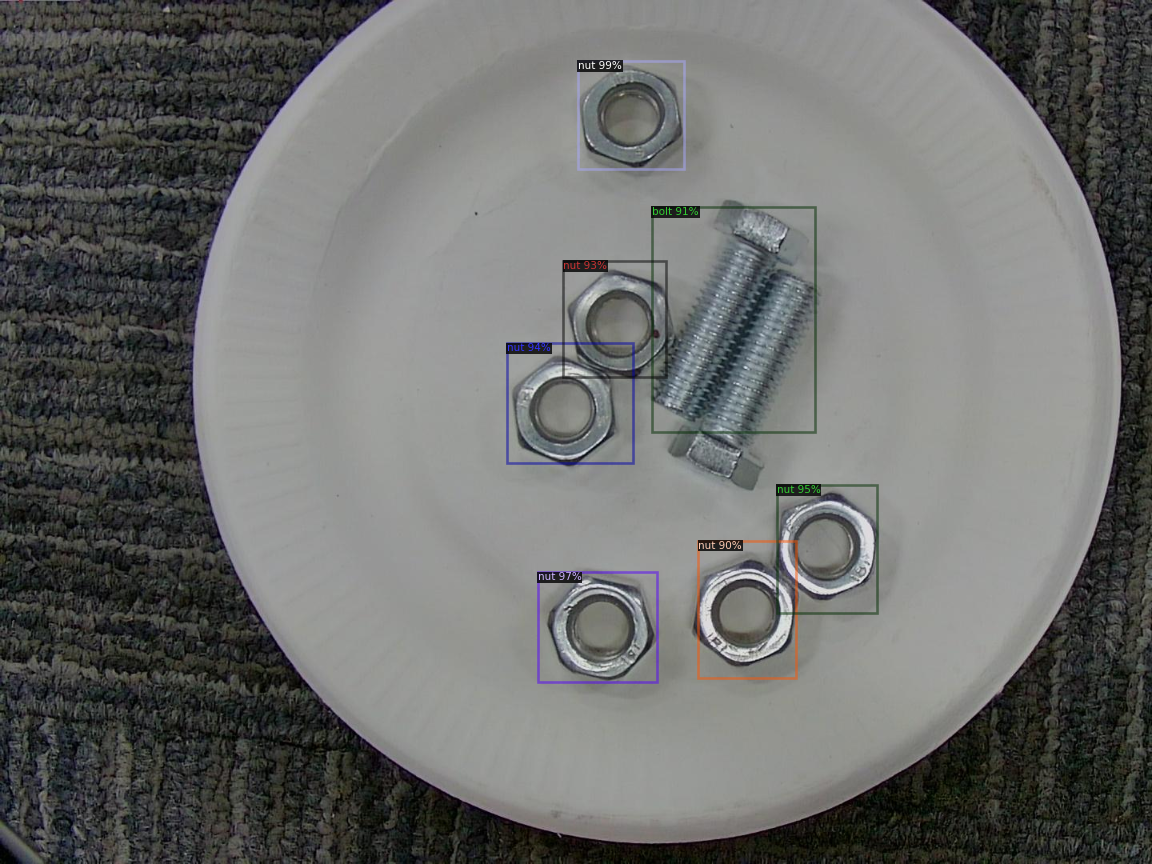

In [24]:
for d in random.sample(test_dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=coco_lslm_test_metadata, 
                   scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])